麦门！——麦当劳产品营养成分你知多少

介绍

麦当劳（McDonald's）是全球大型跨国连锁餐厅，1955年创立于美国芝加哥，在世界上大约拥有3万间分店，遍布全球六大洲119个国家。主要售卖汉堡包，以及薯条、炸鸡、汽水、冰品、沙拉、水果等快餐食品。

麦当劳是首间和最大跨国快餐连锁企业，由于其广泛的全球分店网络，麦当劳已成为公众讨论关于食物导致肥胖、公司道德和消费责任焦点所代表的快餐文化。然而，也有人批评麦当劳的快餐食品缺乏足够的营养均衡，并指责其影响公众健康，例如高热量导致肥胖等问题。

本报告分析麦当劳全部产品中典型营养成分的含量（占每日推荐摄入量的百分比）并主要利用Matplotlib和Plotly库实现数据可视化，得出生动有趣的结论，为大众提供麦当劳消费新思路。

本报告数据来源于Kaggle，原始数据获取地址：https://www.kaggle.com/datasets/mcdonalds/nutrition-facts?resource=download

附加介绍：

Plotly是一个数据可视化和数据分析的开源Python库，具有多种绘图类型，如线图、散点图、条形图、箱型图、热力图等，具有交互性和可定制性。Plotly支持静态图和交互式图的绘制，其中静态图适合在报告和出版物中使用，而交互式图则更适合在web应用程序和数据仪表板中使用。
Plotly作为一款开源的绘图库，可以应用于Python、R、MATLAB、Excel、JavaScript和jupyter等多种语言，主要使用JavaScript进行图形绘制。用户可以使用Plotly提供的各种颜色方案，或者使用自己的颜色方案，以满足自己的需求。用户还可以通过修改布局和样式表来自定义图表的外观。
Plotly Python包具有三个主要模块：plotly.plotly、plotly.graph_objs和plotly.tools。plotly.plotly模块包含需要Plotly服务器响应的函数，plotly.graph_objs模块包含构成绘图的对象的所有类定义，如散点图、方框图、直方图等，而plotly.tools模块包含许多有助于和增强Plotly体验的有用功能。

一、数据收集

原始数据来源于Kaggle，完整数据集可参见仓库中储存的menu.csv文件。

首先先做一些准备工作，下面是整个程序需要应用的库，先全部加载出来。

In [1]:
# 加载需要用的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

下面向大家展示以下本报告采用的数据集的前5行以及总数据集的行数和列数。

In [2]:
#加载数据集
menu = pd.read_csv("menu.csv")

#预览数据集前5行
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
#查看数据集行列数
print("该数据集共有 {} 行 {} 列".format(menu.shape[0],menu.shape[1]))

该数据集共有 260 行 24 列


二、数据处理

本报告通过检测数据缺失值来对确保数据的完整性。

我使用的是Python的Pandas库来检查menu DataFrame中是否有缺失值（NaN）。

menu.isnull(): 这是Pandas的isnull()函数，它会为menu DataFrame中的每一个元素返回一个布尔值（True或False），指示该元素是否是缺失值（NaN）。结果仍然是一个DataFrame，其中True表示原始位置的值为NaN，而False表示不是。
.any(): 这是一个聚合函数，它对每一列中的所有True/False值进行聚合，如果列中有任何True值，它将返回True，否则返回False。在我们的场景中，这意味着它将告诉我们是否有任何缺失值。
总的来说，如果menu.isnull().any()返回True，那么意味着menu DataFrame中至少有一列包含缺失值。如果返回False，则表示没有缺失值。

In [4]:
# 检查缺失值
menu.isnull().any()

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool

可得，menu.csv数据集中无缺失值。

下面对数据集内容的描述性统计也可作为数据集无缺失的依据：

In [5]:
# 各个column内容的描述性统计
menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


三、数据分析

（一）麦当劳产品的分类

首先，我们先来了解麦当劳产品的分类。

In [6]:
#分析每一类产品的数量
count_by_category = menu[["Category"]].groupby(["Category"]).size().reset_index(name = 'Counts').sort_values(by = "Counts", ascending = False)
count_by_category

,Category,Counts
4,Coffee & Tea,95
2,Breakfast,42
7,Smoothies & Shakes,28
1,Beverages,27
3,Chicken & Fish,27
0,Beef & Pork,15
8,Snacks & Sides,13
5,Desserts,7
6,Salads,6


通过上表可得一共有9种类型的产品：Coffee & Tea、Breakfast、Smoothies & Shakes、Beverages、Chicken & Fish、Beef & Pork、Snacks & Sides、Desserts、Salads。

令人惊奇的是，以汉堡可乐薯条炸鸡闻名的麦当劳产品数量最多的类型却是咖啡和茶，数量高达95种！不过这种疑惑通过查看原数据集也解决了，因为几乎每种咖啡和茶类型的产品都有四种型号：大杯、中杯、小杯、儿童杯。这样说来，如果单按照种类来算，一共有25种左右的咖啡和茶，这样看就不觉得奇怪了。

同样，麦当劳奶昔产品的种类之丰富也令人吃惊。不过数据集中的列出的各种奶昔产品在国内的麦当劳不太常见，倒是McFlurry（麦旋风）产品风靡国内市场。但原数据集中麦旋风的种类也似乎不够完整，很多只在国内市场上市的限定麦旋风的种类就没有算在其中。

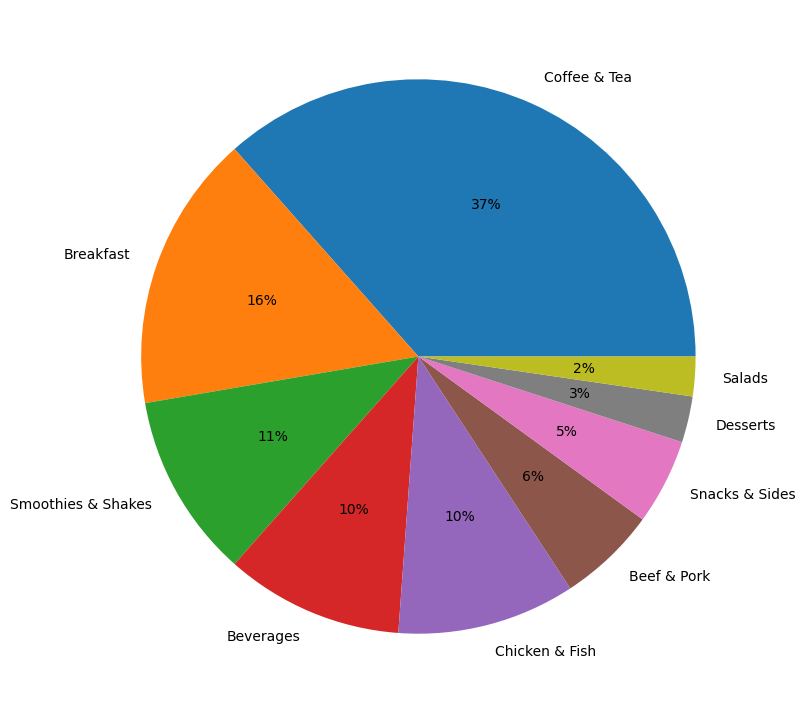

In [7]:
#饼形图
plt.figure(figsize = (12,9))
plt.pie(x = count_by_category["Counts"], labels=count_by_category["Category"], autopct='%1.0f%%',)
plt.show()

一个麦当劳产品分类的饼状图，方便读者结合表格更清楚地了解麦当劳产品类型的占比。

（二）麦当劳产品中营养成分的分析

现在年轻人越来越关注食品中的营养成分含量，但很多“麦门”年轻人对于麦当劳产品中的营养成分含量还不够了解。

下面我根据原数据集中的一些数据，以六大营养元素（碳水化合物、蛋白质、脂肪、无机盐、膳食纤维、维生素）为线索，一一分析其在不同产品中的含量，目的时为读者在选择麦当劳产品时提供一些参考。

（1）碳水化合物

In [8]:
#碳水化合物
trace1 = go.Scatter3d(
    x=menu['Category'].values,
    y=menu['Item'].values,
    z=menu['Carbohydrates (% Daily Value)'].values,
    text=menu['Item'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = menu['Carbohydrates (% Daily Value)'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Carbohydrates (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='碳水化合物（占每日推荐摄入量的百分比）')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

发现：

1.图中很明显的四个红点分别是草莓奶昔、香草奶昔、巧克力奶昔和含M&M巧克力的麦旋风，它们的碳水化合物占比非常高，都接近每日推荐摄入量的50%，应该是含糖量比较高。

2.还有碳水化合物比较高的橙色的三个点分别是麦乐鸡块（40块）以及三种含松饼的早餐产品。

3.碳水化合物含量较少的蓝色点不出所料的大多是一些沙拉以及美式咖啡，其他还有一些常见的产品如汉堡等的碳水化合物的含量都在合理范围内。

结论：对于麦当劳的奶昔以及麦旋风，还有一些早餐产品，建议想要减重的读者谨慎选择。不敢想象，只吃两个麦旋风（有M&M豆）就大概能满足一天碳水的摄入量了。

（2）蛋白质

In [9]:
#蛋白质
trace = go.Scatter3d(
    x=menu['Category'].values,
    y=menu['Item'].values,
    z=menu['Protein'].values,
    text=menu['Item'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = menu['Protein'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Protein'),
        line=dict(color='rgb(255, 255, 255)')
    )
)

data=[trace]
layout=dict(height=800, width=800, title='蛋白质')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

结论：鉴于原数据集中有关蛋白质的数据就不够完整（不是占每日推荐摄入量的百分比，也没有具体单位，不过根据常识可以推断为克），在此不便得出什么具体的结论。不过值得一提的是，图上唯一表示蛋白质含量较高的红点是40块麦乐鸡块，但是国内售卖的一份麦乐鸡块只有5块，想要一口气吃八份麦乐鸡块来补充蛋白质看来还是一个不切实际的想法.

（3）脂肪

脂肪方面，数据集提供了两种脂肪（胆固醇和饱和脂肪酸）以及总脂肪占每日建议摄入量百分比的数据。我利用Plotly将其分别绘制成散点图和3D图，以下将分别阐述我的发现。

In [10]:
#胆固醇
trace = go.Scatter(
    y = menu['Cholesterol (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Cholesterol (% Daily Value)'].values,
        color = menu['Cholesterol (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= '胆固醇（占每日推荐摄入量的百分比）',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Cholesterol (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

In [11]:
#饱和脂肪酸
trace = go.Scatter(
    y = menu['Saturated Fat (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Saturated Fat (% Daily Value)'].values,
        color = menu['Saturated Fat (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= '饱和脂肪酸（占每日推荐摄入量的百分比）',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Saturated Fat (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

In [12]:
#总脂肪
trace1 = go.Scatter3d(
    x=menu['Category'].values,
    y=menu['Item'].values,
    z=menu['Total Fat (% Daily Value)'].values,
    text=menu['Item'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = menu['Total Fat (% Daily Value)'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='总脂肪（占每日推荐摄入量的百分比）')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

发现：

1.左边的几个红点（Big Breakfast系列）最令人注目，这表明某些食品的胆固醇含量远超每日推荐摄入量，甚至达到了185%。红点下面一些是更多的黄点，如Egg/Sausage麦满分系列（这一部分在本程序跑出的图上显示不明显，不过由于Plotly可视化是动态化的，可以将光标在红色区域滑动，通过弹出的数据框了解）这些食品的胆固醇含量基本上也满足了每日摄入量。

2.含有胆固醇最多的产品：Big Breakfast (Large Biscuit)，这个系列产品同样碳水化合物含量较多。

3.饱和脂肪酸散点图中含有了更多的红点和橙点，说明麦当劳更多的产品含有过量的饱和脂肪酸，只食用一份便可以达到每日推荐摄入量。

4.含有饱和脂肪酸最多的食物: 麦旋风（含MM豆）, 40块麦乐鸡, 大份早餐拼盘（含热松饼）等。

5.总脂肪（占每日推荐摄入量的百分比）3D图中，数值最大的红点是40块麦乐鸡，竟然达到了每日推荐摄入量的182%！还有黄色的点包括好几种Big Breakfast系列早餐，总脂肪量也达到了每日推荐摄入量的90%左右，吃一顿早餐就摄入了一天的脂肪量。还有麦旋风系列的一些产品，数值也达到了50%。

结论：麦当劳热门产品在脂肪含量方面严重翻车，油炸食品和超甜食品还是得少吃啊！

（4）无机盐

无机盐方面，我本想和其他营养物质一样做一个总含量的3D图，但是数据集中只提供了钠、钙、铁占每日推荐摄入量的百分比，而钙和铁的实际含量都没有。把三种相对百分比直接求平均值也太牵强了，为了保证报告的科学性，我还是选择了分别对钠、钙、铁含量进行分析。

In [13]:
#钠
trace = go.Scatter(
    y = menu['Sodium (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Sodium (% Daily Value)'].values,
        color = menu['Sodium (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= '钠（占每日推荐摄入量的百分比）',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Sodium (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

In [14]:
#钙
trace = go.Scatter(
    y = menu['Calcium (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Calcium (% Daily Value)'].values,
        color = menu['Calcium (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= '钙（占每日推荐摄入量的百分比）',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Calcium (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

In [15]:
#铁
trace = go.Scatter(
    y = menu['Iron (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Iron (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Iron (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= '铁（占每日推荐摄入量的百分比）',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Iron (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

发现：

1.钠散点图的分布与上面的胆固醇散点图分布比较类似。最大的红点来自于麦乐鸡（含40块），其含钠量是每日推荐摄入量的150%，其次是大份早餐拼盘（含松饼）系列，在90%左右。

2.钙散点图上红点还是挺多的，说明麦当劳产品的钙营养含量尚可。

3.没有任何食物的铁（占每日推荐摄入量的百分比）超过40%。铁含量最多的是Big Breakfast系列的产品。

结论：相比于不健康营养元素的“频频超标”（如脂肪，钠等），健康营养元素（如铁）的含量不尽如人意。

（5）膳食纤维

In [16]:
#膳食纤维
trace = go.Scatter3d(
    x=menu['Category'].values,
    y=menu['Item'].values,
    z=menu['Dietary Fiber (% Daily Value)'].values,
    text=menu['Item'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = menu['Dietary Fiber (% Daily Value)'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Dietary Fiber (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)

data=[trace]
layout=dict(height=800, width=800, title='膳食纤维（占每日推荐摄入量的百分比）')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

结论:麦当劳产品膳食纤维的含量也不容乐观，含量最多的Big Breakfast系列的两款产品中膳食纤维（占每日推荐摄入量的百分比）也只有28%，这与该系列产品脂肪和碳水化合物含量的明显超标形成了鲜明对比。

（6）维生素

维生素数据情况与无机盐类似，这里只分别分析维生素A和维生素C的含量。

In [17]:
#维生素A
trace = go.Scatter(
    y = menu['Vitamin A (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Vitamin A (% Daily Value)'].values,
        color = menu['Vitamin A (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= '维生素A（占每日推荐摄入量的百分比）',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Vitamin A (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

In [18]:
#维生素C
trace = go.Scatter(
    y = menu['Vitamin C (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Vitamin C (% Daily Value)'].values,
        color = menu['Vitamin C (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= '维生素C（占每日推荐摄入量的百分比）',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Vitamin C (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

发现：

1.麦当劳产品中维生素A的含量与不健康营养元素相比还是太少了，有几个维生素A含量较高的也是意料之中的沙拉。

2.麦当劳产品中维生素C的含量也没好到哪去，含量较高的是苹果汁、苹果片和燕麦粥（含水果）。

结论：可以看出，如果想要在麦当劳补充维生素，不如去菜市场买点新鲜蔬菜和水果。

（7）卡路里

一个麦当劳产品卡路里含量从高到低排序的条形图，给读者更多参考信息。

In [19]:
#按照卡路里含量对食品排序
x, y = (list(x) for x in zip(*sorted(zip(menu.Calories.values, menu.Item.values), reverse = False)))
# 绘制条形图                                                      
trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Jet',
        reversescale = False
    ),
    name='Household savings, percentage of household disposable income',
    orientation='h',
)

layout = dict(
    title='麦当劳食品的卡路里含量',
     width = 1500, height = 2600,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

四、总结

通过对麦当劳产品的各种数据的可视化以及分析，我们对麦当劳产品的营养元素含量有了一个大致的了解。总体来说，麦当劳产品中像脂肪和钠等不健康营养元素相对于健康营养元素还是较多，过量食用可能会导致发胖等不良后果，这证实了生活中我们常常听到的对麦当劳“垃圾食品”的定位。在此还是建议大家在有选择的条件下尽量少吃麦当劳，特别是麦乐鸡、麦旋风以及Big Breakfast系列的一些产品。

不过话又说回来，本调查者作为一个忠诚的“麦门”信徒，深知大多数人在选择消费麦当劳产品时，并不考虑其中营养元素的含量。如果你吃麦当劳是为了快乐，那这份报告就作为你无聊时的一个消遣，看过一笑就行。